In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('all.csv')
df['efficiency'] = df['attack'] / df['exchange']

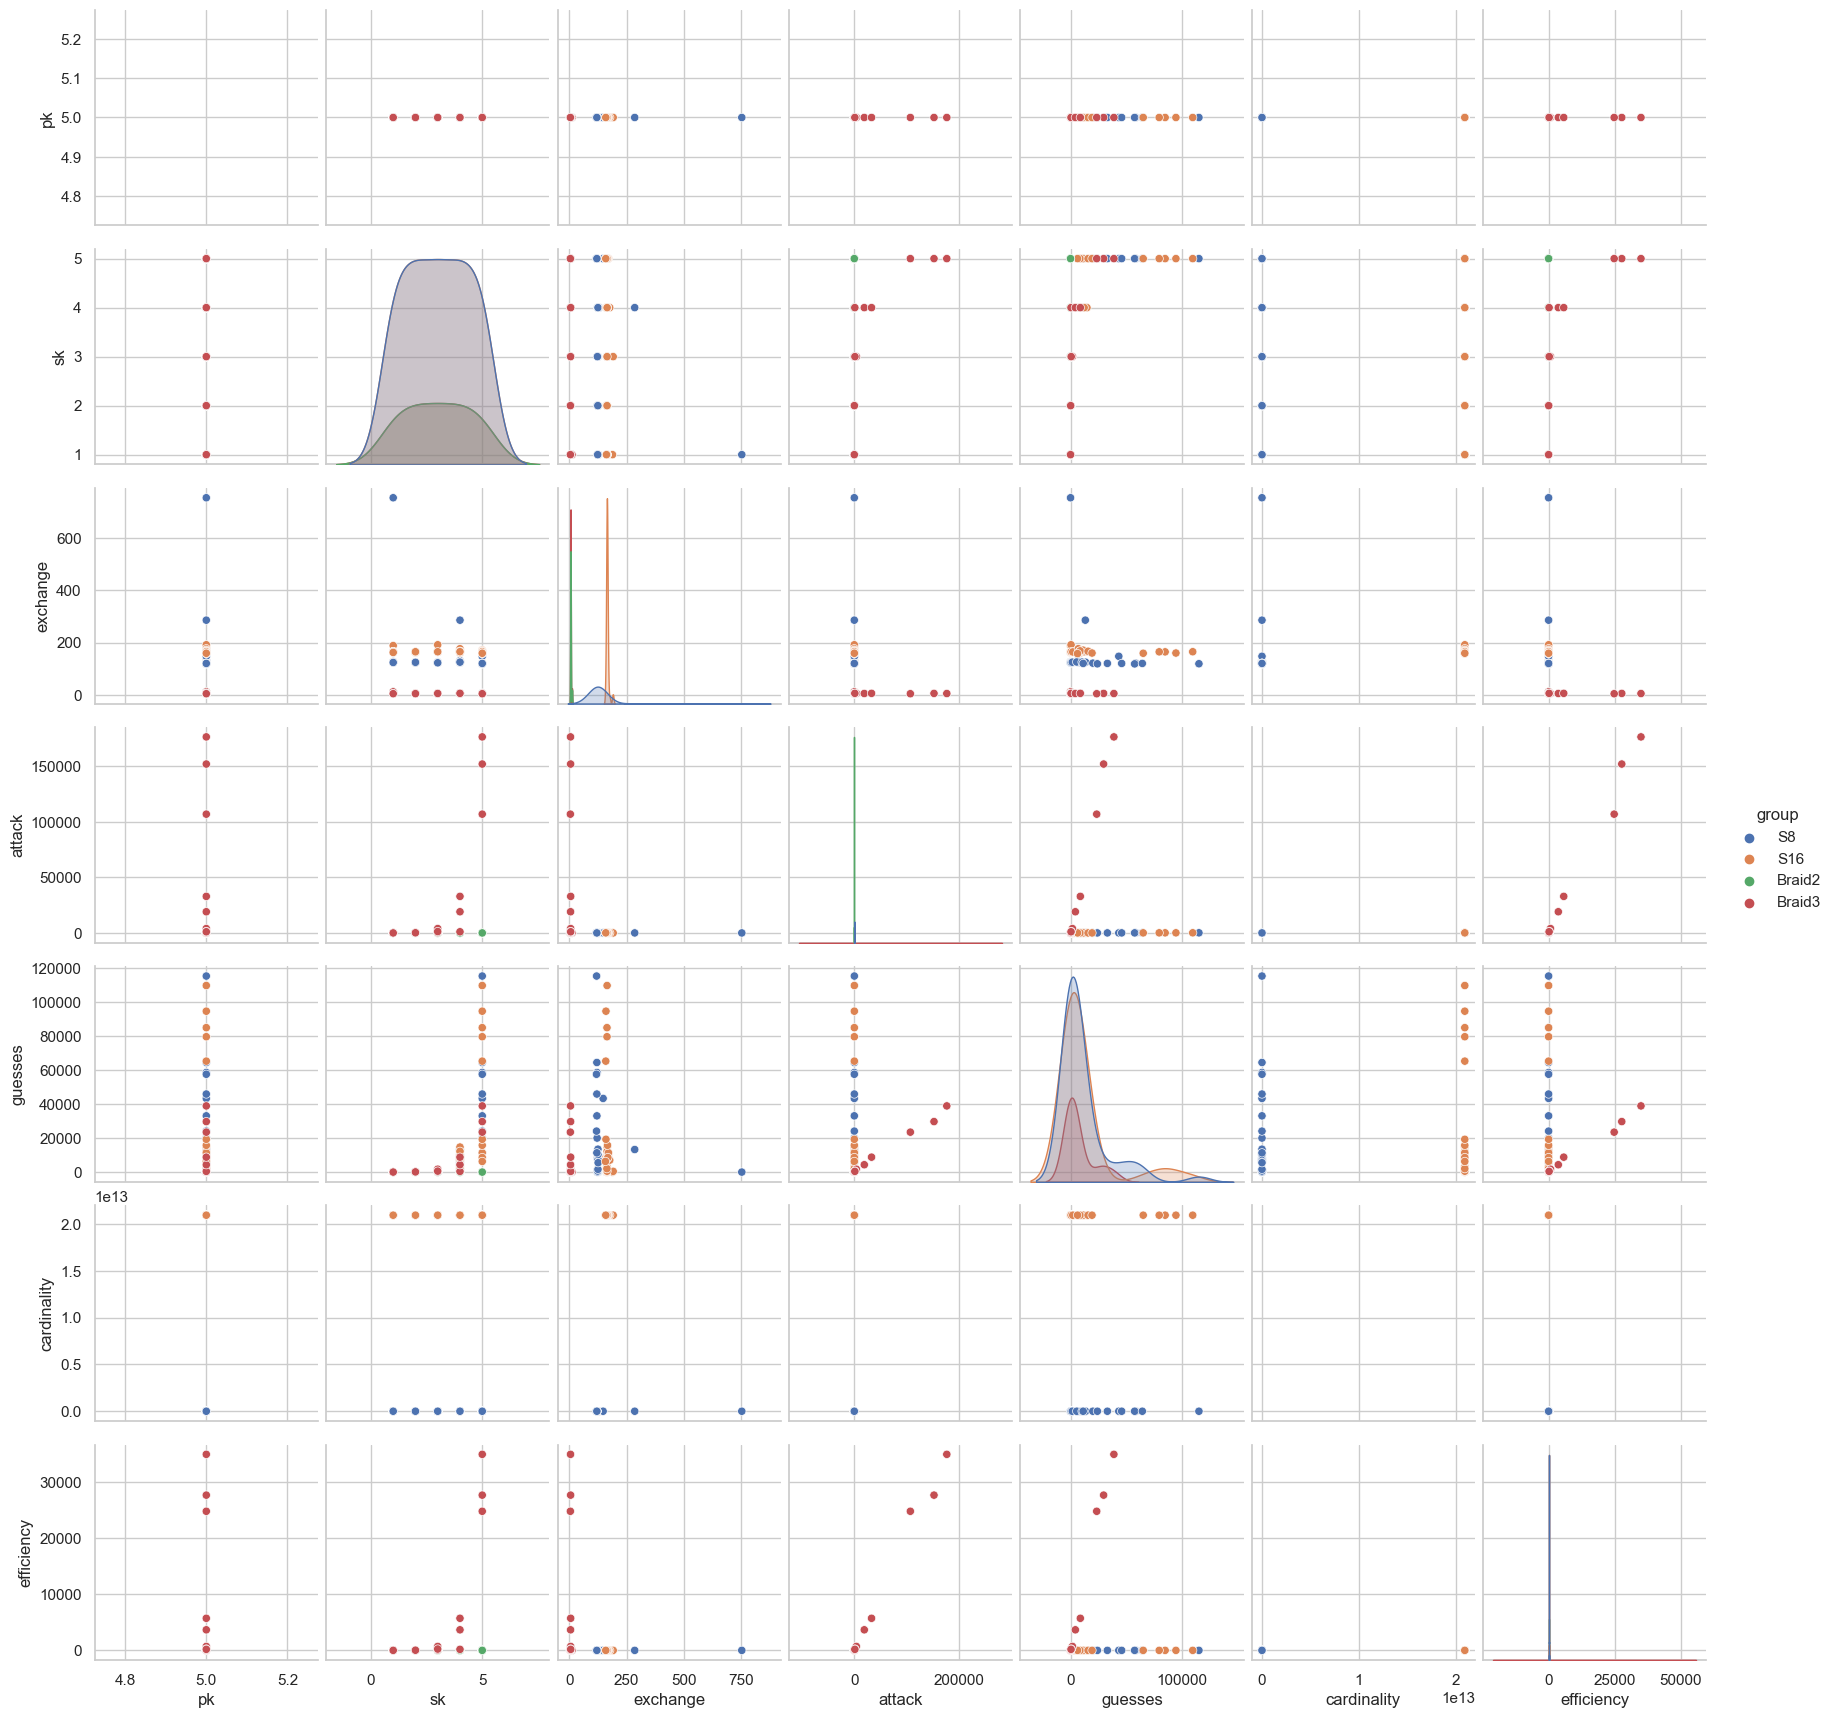

In [4]:
sns.set_theme(style="whitegrid")
gfg = sns.pairplot(data=df[df['sk'] <= 5], hue='group')
plt.show()

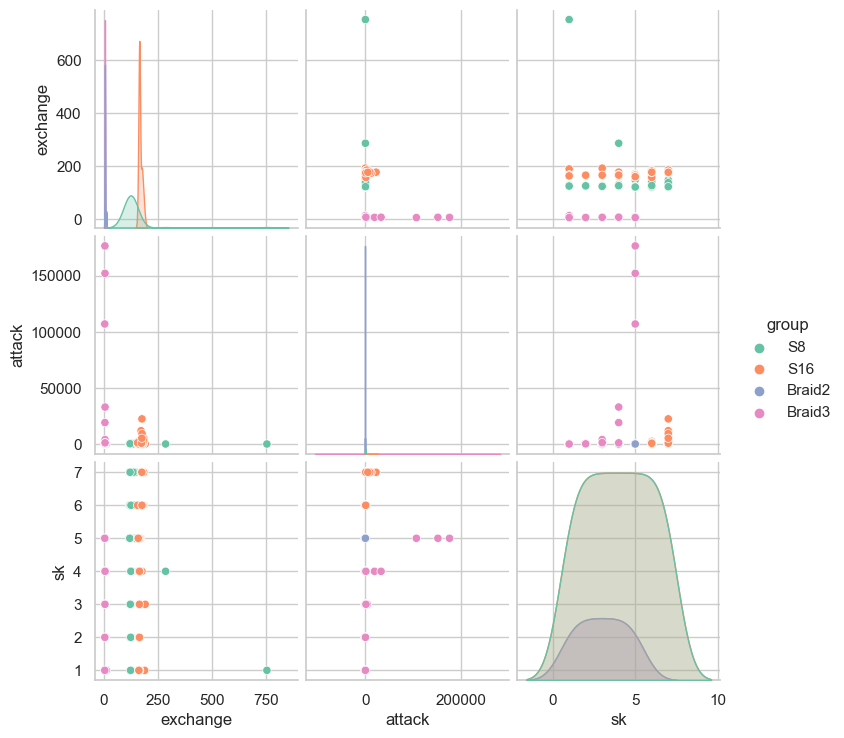

In [5]:
sns.set_theme(style="whitegrid")
gfg = sns.pairplot(data=df, hue='group', vars=['exchange', 'attack', 'sk'], palette='Set2')
plt.show()

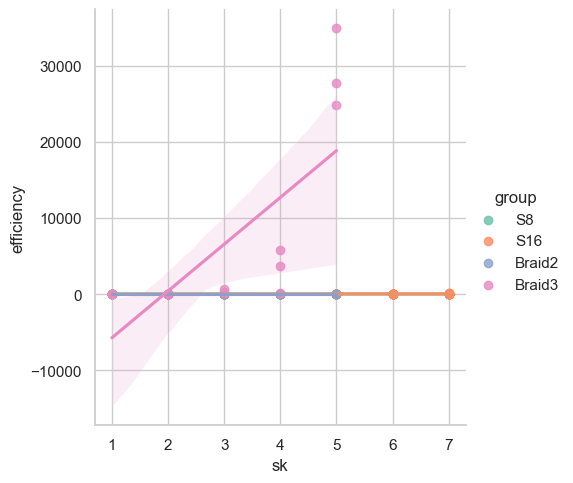

In [6]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df, x='sk', y='efficiency', hue='group', palette='Set2')

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


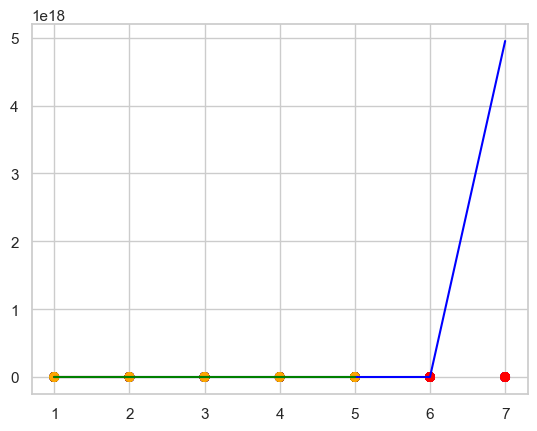

In [15]:
# exponential regression on each group 

# plot guesses against sk for each group using matplotlib
colors = {'S16': 'red', 'S8': 'blue', 'Braid2': 'green', 'Braid3': 'orange'}
plt.scatter(df['sk'], df['guesses'], c=df['group'].map(colors))

# plot the regression lines
for g in df['group'].unique():
    x = df[df['group'] == g]['sk']
    y = df[df['group'] == g]['efficiency']
    m, b = np.polyfit(x, np.log(y), 1)
    plt.plot(x, np.exp(m*x + b), c=colors[g])

plt.show()


/opt/homebrew/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/function_base.py:4529: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


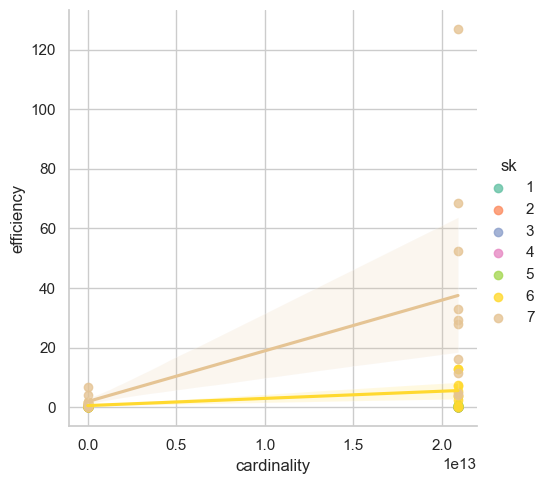

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df, x='cardinality', y='efficiency', hue='sk', palette='Set2')

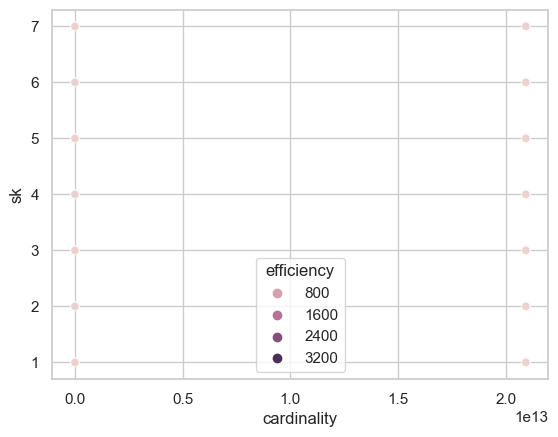

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
df['efficiency'] = df['attack'] / df['exchange']
gfg = sns.scatterplot(data=df, x='cardinality', y='sk', hue='efficiency')